In [2]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [14]:
folder_path = 'runs/test_1/vel_0.1_temp_300'

pos_files = glob.glob(os.path.join(folder_path, '**', 'gr*.pos'), recursive=True)

print(pos_files)

['runs/test_1/vel_0.1_temp_300/pos/graphene.4700.pos', 'runs/test_1/vel_0.1_temp_300/pos/graphene.9700.pos', 'runs/test_1/vel_0.1_temp_300/pos/graphene.6200.pos', 'runs/test_1/vel_0.1_temp_300/pos/graphene.500.pos', 'runs/test_1/vel_0.1_temp_300/pos/graphene.7500.pos', 'runs/test_1/vel_0.1_temp_300/pos/graphene.8700.pos', 'runs/test_1/vel_0.1_temp_300/pos/graphene.10500.pos', 'runs/test_1/vel_0.1_temp_300/pos/graphene.400.pos', 'runs/test_1/vel_0.1_temp_300/pos/graphene.7200.pos', 'runs/test_1/vel_0.1_temp_300/pos/graphene.1800.pos', 'runs/test_1/vel_0.1_temp_300/pos/graphene.6400.pos', 'runs/test_1/vel_0.1_temp_300/pos/graphene.2100.pos', 'runs/test_1/vel_0.1_temp_300/pos/graphene.2600.pos', 'runs/test_1/vel_0.1_temp_300/pos/graphene.11700.pos', 'runs/test_1/vel_0.1_temp_300/pos/graphene.11300.pos', 'runs/test_1/vel_0.1_temp_300/pos/graphene.12900.pos', 'runs/test_1/vel_0.1_temp_300/pos/graphene.700.pos', 'runs/test_1/vel_0.1_temp_300/pos/graphene.600.pos', 'runs/test_1/vel_0.1_temp_3

In [15]:
def count_data(filepath):
    coordinates = []

    with open(filepath, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith("ITEM: TIMESTEP"):
                timestep = int(lines[lines.index(line) + 1].strip())
            if line.startswith("ITEM: ATOMS"):
                line_atom = line
                break

        for line in lines[lines.index(line_atom)+1:]:
            if line.strip():
                parts = line.split()
                if len(parts) >= 5:
                    x = float(parts[2])
                    y = float(parts[3])
                    z = float(parts[4])
                    vx = float(parts[5])
                    vy = float(parts[6])
                    vz = float(parts[7])
                    if len(parts) >=9:
                        c = float(parts[8])
                    else:
                        c = -1
                    coordinates.append([x, y, z, vx, vy, vz, c])
                    

    coordinates = np.array(coordinates)

    mean_coordinates = np.mean(coordinates, axis=0)

    #print(f"Timestep: {timestep}")
    #print(f"Средние координаты атомов (x, y, z): {mean_coordinates}"
    
    return np.append(mean_coordinates, timestep)

In [16]:
filename = 'data/all.' + str(0) + '.pos'

count_data(filename)

array([ 2.28070175e-08,  2.39473700e-07,  2.05242364e+01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.00000000e+00,  0.00000000e+00])

In [17]:
data = []

for filepath in pos_files:
    data.append(count_data(filepath))

In [18]:
df = pd.DataFrame(data, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'c', 'Step'])

In [37]:
df = df.sort_values(by='Step')
df

,x,y,z,vx,vy,vz,c,Step
115,4.229421e-17,3.125000e-07,20.000000,0.000000,0.000000,0.000000,3.000000,0.0
55,1.488095e-08,3.277801e-16,19.996900,0.000000,0.000000,0.000000,3.000000,100.0
64,2.326182e-16,9.419643e-07,19.990800,0.000000,0.000000,0.000000,3.000000,200.0
112,-8.987520e-17,4.464285e-09,19.987100,0.000000,0.000000,0.000000,3.000000,300.0
7,-4.229421e-17,1.696429e-07,19.985000,0.000000,0.000000,0.000000,3.000000,400.0
...,...,...,...,...,...,...,...,...
107,1.632658e-01,-1.346837e-01,22.805721,0.000665,0.000167,0.007595,2.991071,12500.0
128,1.663728e-01,-1.336736e-01,22.842608,0.000566,0.000220,0.007149,2.991071,12600.0
20,1.691864e-01,-1.325552e-01,22.877476,0.000574,0.000233,0.006823,2.989583,12700.0
79,1.719566e-01,-1.312063e-01,22.910800,0.000522,0.000321,0.006497,2.991071,12800.0


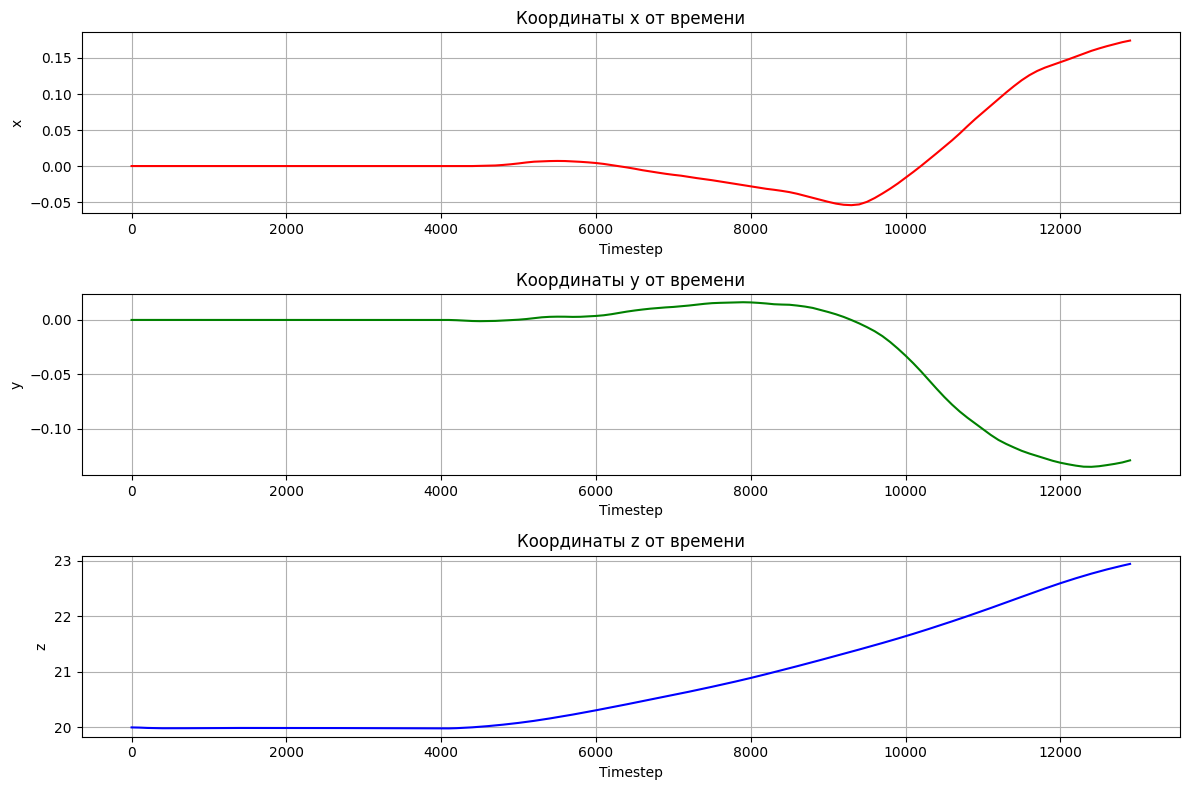

In [27]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df.Step, df.x, label='x', color='r')
plt.xlabel('Timestep')
plt.ylabel('x')
plt.title('Координаты x от времени')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(df.Step, df.y, label='y', color='g')
plt.xlabel('Timestep')
plt.ylabel('y')
plt.title('Координаты y от времени')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(df.Step, df.z, label='z', color='b')
plt.xlabel('Timestep')
plt.ylabel('z')
plt.title('Координаты z от времени')
plt.grid(True)

plt.tight_layout()
plt.show()

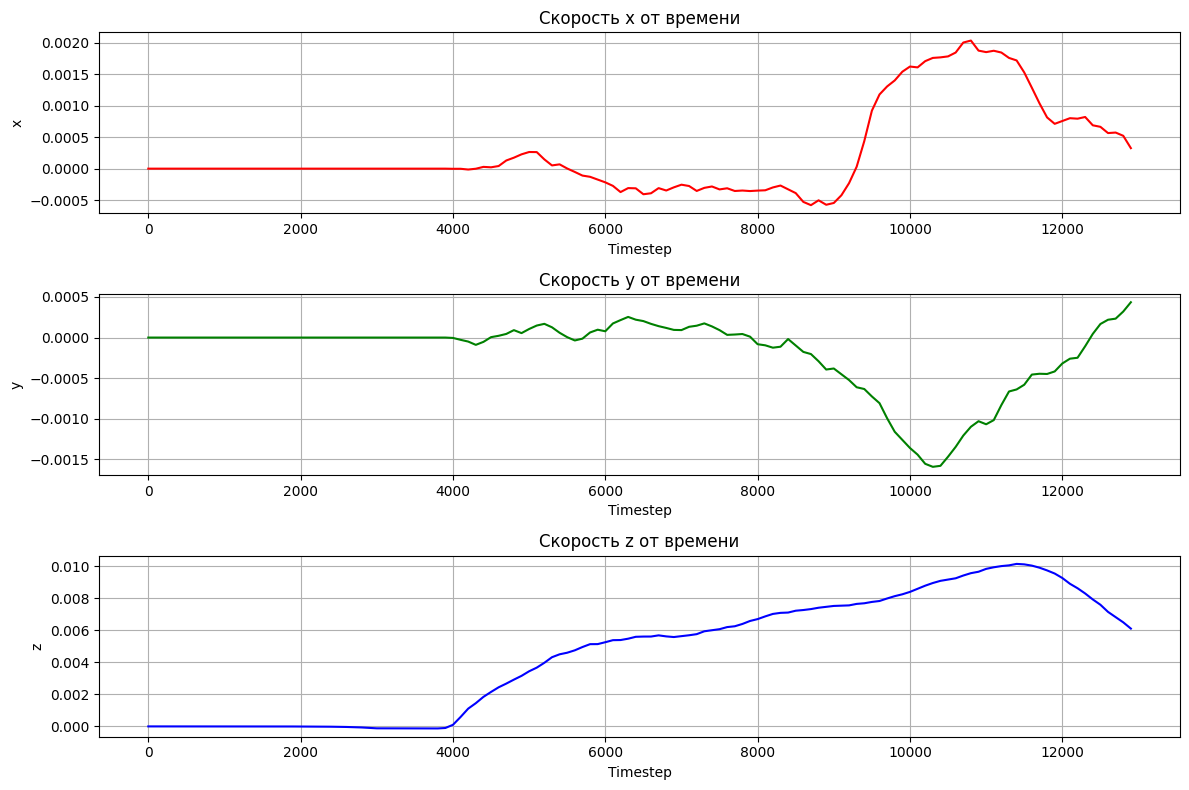

In [28]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df.Step, df.vx, label='x', color='r')
plt.xlabel('Timestep')
plt.ylabel('x')
plt.title('Скорость x от времени')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(df.Step, df.vy, label='y', color='g')
plt.xlabel('Timestep')
plt.ylabel('y')
plt.title('Скорость y от времени')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(df.Step, df.vz, label='z', color='b')
plt.xlabel('Timestep')
plt.ylabel('z')
plt.title('Скорость z от времени')
plt.grid(True)

plt.tight_layout()
plt.show()

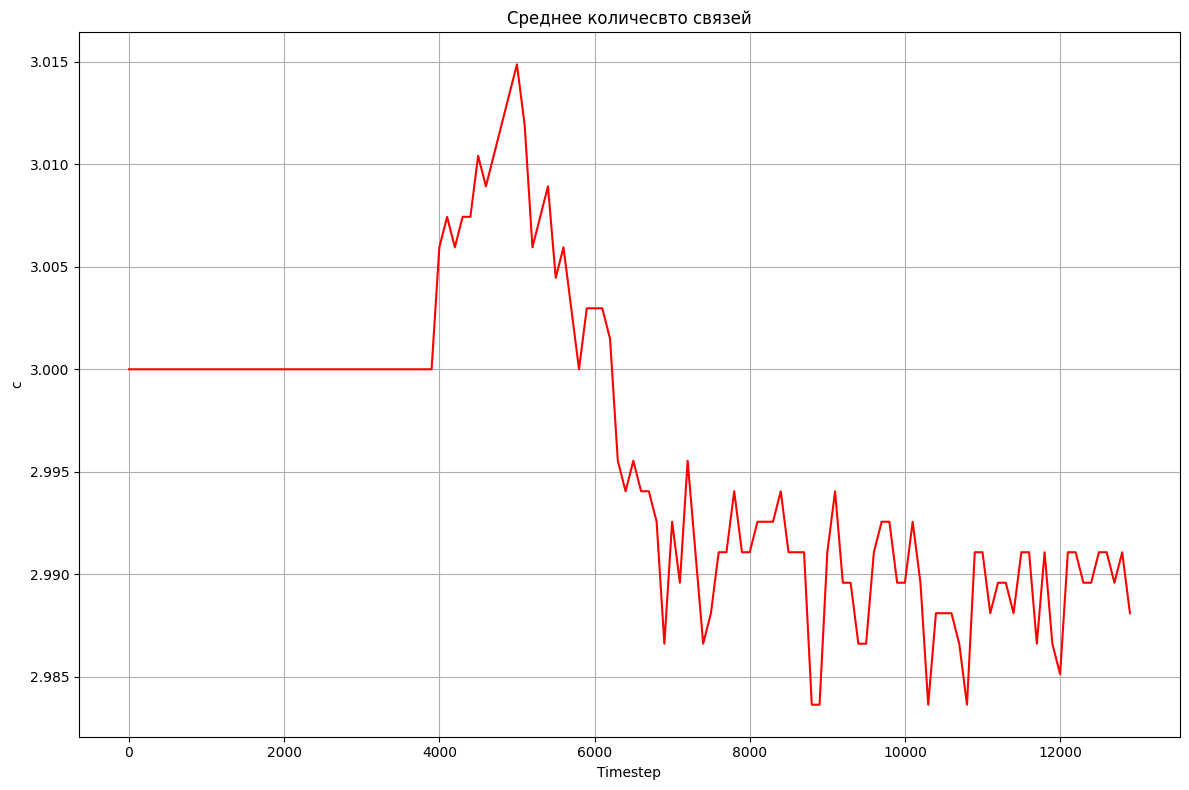

In [29]:
plt.figure(figsize=(12, 8))

plt.plot(df.Step, df.c, label='x', color='r')
plt.xlabel('Timestep')
plt.ylabel('c')
plt.title('Среднее количесвто связей')
plt.grid(True)

plt.tight_layout()
plt.show()

In [36]:
import re
import pandas as pd

def extract_lammps_data(log_file):
    with open(log_file, 'r') as file:
        log_data = file.read()

    pattern = r"\s*(\d+)\s+([\d\.]+)\s+([\d\.-]+)\s+([\d\.-]+)\s+([\d\.-]+)\s+([\d\.-]+)\s+([\d\.-]+)\s+([\d\.-]+)"

    matches = re.findall(pattern, log_data, re.MULTILINE)

    if matches:
        data = pd.DataFrame(matches, columns=['Step', 'Time', 'Temp', 'PotEng', 'KinEng', 'TotEng', 'Press', 'Volume'])
        
        data = data.apply(pd.to_numeric, errors='ignore')
        
        data = data.sort_values(by='Step')

        return data
    else:
        print("Совпадения не найдены.")
        return None

log_file = 'log.lammps' 
data = extract_lammps_data(log_file)



data

,Step,Time,Temp,PotEng,KinEng,TotEng,Press,Volume
0,0,0.0,0.00,-189585.77,0.0,-189585.77,-21.017154,435330.70
155,1,0.0,0.00,0.00,0.0,0.00,0,0.00
154,1,0.0,0.00,0.00,0.0,0.00,0,0.00
156,1,0.0,0.00,0.00,0.0,0.00,0,0.00
51,1,0.0,0.00,0.00,0.0,0.00,0,0.00
...,...,...,...,...,...,...,...,...
114,9100,1493.6,569229.17,-182708.48,1932614.2,1749905.80,201824.85,436617.21
115,9200,1498.6,570274.58,-183982.23,1936163.5,1752181.30,202014.12,436617.21
116,9300,1503.6,570312.08,-184155.15,1936290.9,1752135.70,202015.35,436617.21
117,9400,1508.6,570321.10,-184184.61,1936321.5,1752136.90,202141.27,436617.21


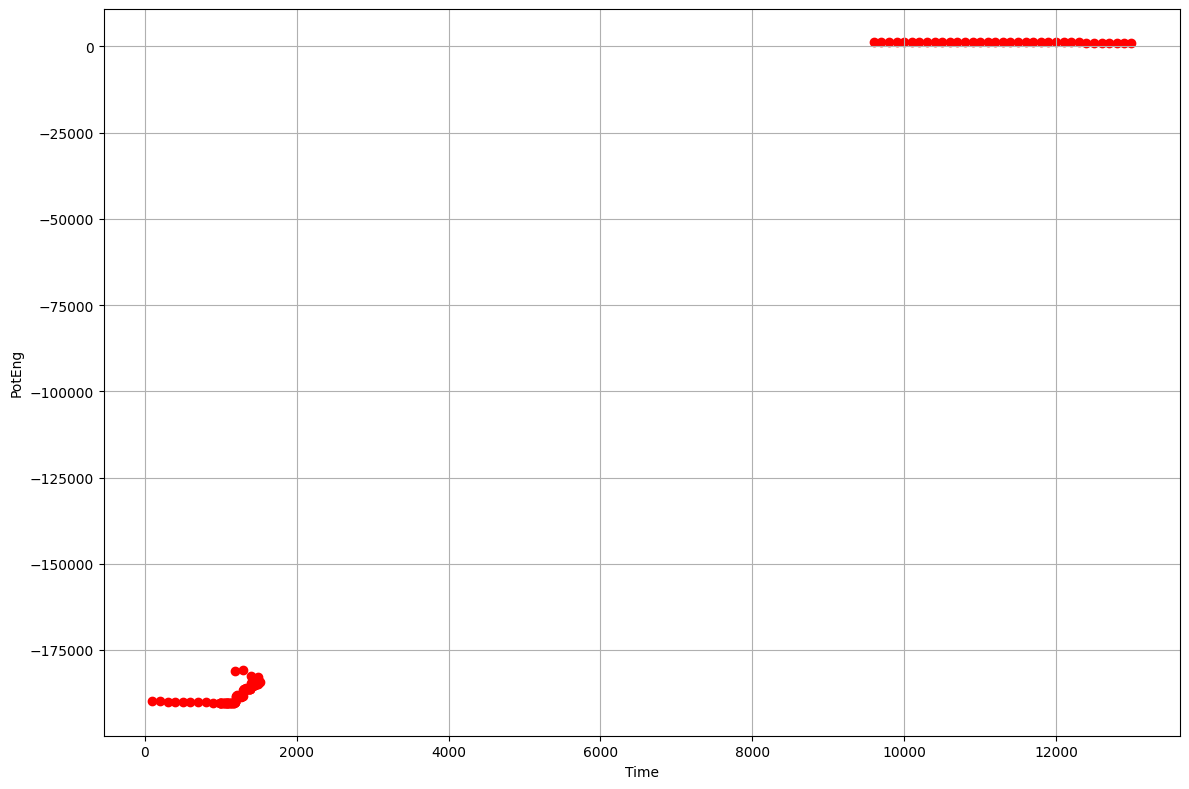

In [35]:
plt.figure(figsize=(12, 8))

plt.scatter(data.Time[data.Time>0], data.PotEng[data.Time>0], label='x', color='r')
plt.xlabel('Time')
plt.ylabel('PotEng')
#plt.title('Среднее количесвто связей')
plt.grid(True)

plt.tight_layout()
plt.show()